In [5]:
import open3d as o3d
import numpy as np
import importlib
import matplotlib.pyplot as plt
import h5py
import functions.pc_matching
import functions.mat_to_py
import functions.viz
import functions.pc_registration
importlib.reload(functions.pc_matching)
importlib.reload(functions.mat_to_py)
importlib.reload(functions.viz)
importlib.reload(functions.pc_registration)
from functions.pc_matching import PCMatch
from functions.mat_to_py import PCNIData
from functions.viz import pc_viz, video_cv, pc2video
from functions.pc_registration import PointReg

Loading Datasets : In this part we will just be working with the point cloud data.

In [6]:
match_points = PCMatch()
data_points1 = PCNIData('C:\\Users\\dasgu\\Documents\\GitHubPercep\\sensordata\\Jul22data',eg=6)
data_points2 = PCNIData('C:\\Users\\dasgu\\Documents\\GitHubPercep\\sensordata\\Jul22data',eg=7)
data_points3 = PCNIData('C:\\Users\\dasgu\\Documents\\GitHubPercep\\sensordata\\Jul22data',eg=8)
data_points4 = PCNIData('C:\\Users\\dasgu\\Documents\\GitHubPercep\\sensordata\\Jul22data',eg=9)
data_list1 = data_points1('pc')
data_list2 = data_points2('pc')
data_list3 = data_points3('pc')
data_list4 = data_points4('pc')

loading  C:\Users\dasgu\Documents\GitHubPercep\sensordata\Jul22data\pcdata\2022-06-16-13-01-40_6_pc.mat
loading  C:\Users\dasgu\Documents\GitHubPercep\sensordata\Jul22data\pcdata\2022-06-16-13-01-40_7_pc.mat
loading  C:\Users\dasgu\Documents\GitHubPercep\sensordata\Jul22data\pcdata\2022-06-16-13-01-40_8_pc.mat
loading  C:\Users\dasgu\Documents\GitHubPercep\sensordata\Jul22data\pcdata\2022-06-16-13-01-40_9_pc.mat


Loading the Static Frame

In [7]:
static_point = PCNIData('C:\\Users\\dasgu\\Documents\\GitHubPercep\\sensordata\\Jul22data',eg=1)
static_pc = static_point('pc')
pc_viz(static_pc[150])
np.save('ref/reference_pc_new(2).npy',static_pc[120])

loading  C:\Users\dasgu\Documents\GitHubPercep\sensordata\Jul22data\pcdata\2022-06-16-13-01-40_1_pc.mat


Visualise the bag

In [8]:
img_list = data_points3('image')
video_cv(img_list)
pc_viz(data_list1[590])

loading  C:\Users\dasgu\Documents\GitHubPercep\sensordata\Jul22data\imgdata\2022-06-16-13-01-40_8_img.mat


Generalised ICP

In [12]:
pc_viz(data_list2[450])
print(len(data_list2))
data_lists = data_list1 + data_list2 + data_list3 + data_list4
print(len(data_lists))

600
2395


In [27]:
# Running the whole algorithm at once
static_pc = np.load('reference_pc_new.npy')
fc = []
for i in range(45):
    if i % 3 == 0:
        fc.append(match_points(static_pc,data_list3[i]))
print(len(fc))

# fc1 = match_points(static_pc,data_list2[585])
# print(len(fc1))
# for i in ran
# fc2 = match_points(static_pc,data_list2[590])
# fc3 = match_points(static_pc,data_list2[595])
# fc5 = match_points(static_pc,data_list3[5])
# fc6 = match_points(static_pc,data_list3[10])
# fc7 = match_points(static_pc,data_list3[15])
# fc8 = match_points(static_pc,data_list3[20])
# fc9 = match_points(static_pc,data_list2[450])


[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 4
point cloud has 4 clusters
[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 4
point cloud has 4 clusters
[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 4
point cloud has 4 clusters
[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 3
point cloud has 3 clusters
[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 5
point cloud has 5 clusters
[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters

In [28]:
import functions.pc_registration
importlib.reload(functions.pc_registration)
from functions.pc_registration import PointReg
point_reg = PointReg()
fr_list = [fc1[0],fc2[0],fc3[0],fc4[0],fc5[0],fc6[0]]
reg_pts = fr_list[0]
print('Initial number of points in cluster: ',reg_pts.shape[0])
fr_list = fr_list[1:]
for i in fr_list:
    reg_pts = point_reg(i,reg_pts)
print('Total points in aggregated point cloud ',reg_pts.shape[0])

NameError: name 'fc4' is not defined

Tracking

In [1]:
import functions.tracking
importlib.reload(functions.tracking)
from functions.tracking import Track

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


NameError: name 'importlib' is not defined

In [ ]:
final_clusters = []
numbers = [25,30,35,40]
for i in range(len(numbers)):
    print(i,numbers[i])
    final_clusters.append(match_points(static_pc,data_list[numbers[i]]))


In [123]:
import functions.tracking
importlib.reload(functions.tracking)
from functions.tracking import Track
##Testing Codes##
# len(final_clusters)
track_points = Track()
# centers = []
# clusters = []
# for i in range(len(final_clusters)):
#     center,cluster = track_points.clusters(final_clusters[i])
#     #print(center)
#     centers.append([center])
#     print('The value of center is :==')
#     print(centers[i])

In [118]:
pred_objects = []
for i in range(len(final_clusters)):
    objects,cluster = track_points.register_object(final_clusters[i],10)
    print(len(objects))
    #print(objects)
    #print('next step')
    if i > 2:
        pred_objects = track_points.predict(0.166,'Interpolation')
        print('prediction')
        print(pred_objects)

NameError: name 'final_clusters' is not defined

In [125]:
import functions.ClusterFinders
importlib.reload(functions.ClusterFinders)
from functions.ClusterFinders import ClusterFinder
Find = ClusterFinder()
object,cluster = Find(static_pc,data_list3,40,3)

[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 4
point cloud has 4 clusters
[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 4
point cloud has 4 clusters
[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 4
point cloud has 4 clusters
[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 3
point cloud has 3 clusters
[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 5
point cloud has 5 clusters
[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters

In [127]:
len(cluster[0])

14

Generalised ICP 

In [129]:
import functions.pc_registration
importlib.reload(functions.pc_registration)
from functions.pc_registration import PointReg
point_reg = PointReg()
# fr_list = [fc1[0],fc2[0],fc3[0],fc4[0],fc5[0],fc6[0]]
reg_pts = cluster[1][0]
print('Initial number of points in cluster: ',reg_pts.shape[0])
fr_list = cluster[1][1:]
for i in cluster[1]:
    reg_pts = point_reg(i,reg_pts)
print('Total points in aggregated point cloud ',reg_pts.shape[0])

Initial number of points in cluster:  145
Apply Generalised ICP
RegistrationResult with fitness=1.000000e+00, inlier_rmse=0.000000e+00, and correspondence_set size of 145
Access transformation to get result.
Transformation after ICP is:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
0  points added
Apply Generalised ICP
RegistrationResult with fitness=1.000000e+00, inlier_rmse=3.727224e-02, and correspondence_set size of 141
Access transformation to get result.
Transformation after ICP is:
[[ 0.99047801  0.02125267 -0.1360207   0.32718217]
 [-0.03785369  0.99197287 -0.12065207  0.31851686]
 [ 0.13236467  0.12465211  0.98333181 -0.36459809]
 [ 0.          0.          0.          1.        ]]
141  points added
Apply Generalised ICP
RegistrationResult with fitness=9.084967e-01, inlier_rmse=3.757015e-02, and correspondence_set size of 139
Access transformation to get result.
Transformation after ICP is:
[[ 0.96871417  0.07452831 -0.23672429  0.58601301]
 [-0.09788808  0.99125

NN per-points feature predictor

In [41]:
import functions.f_model
importlib.reload(functions.f_model)
from functions.f_model import PCup, PCdown, PCRegister
from torch.summary import summary
import torch

model = PCRegister()
x = torch.stack([torch.tensor(corrected_pc[0],dtype=torch.float32),torch.tensor(corrected_pc[0],dtype=torch.float32)],0)
print(x.shape)
res = model(x)

torch.Size([2, 100, 3])
expanded size torch.Size([2, 256, 128])
contracted size torch.Size([2, 128, 512])


In [152]:
if 0:
    print('yes')

In [ ]:
import argparse
def parse_arguments():
    parser = argparse.ArgumentParser()

    parser.add_argument('--var_field', type=str, default='enter default value',
                        help='short description of the field')

    return parser.parse_args()

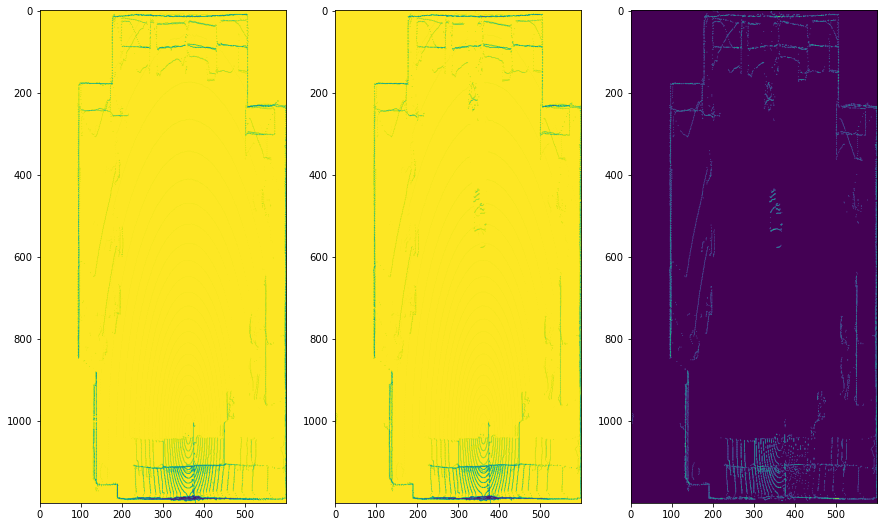

In [227]:
static_pc = np.load('ref_chair_pc.npy')
xyz1 = np.nan_to_num(static_pc,True)
xyz2 = np.nan_to_num(data_list[25],True)
xy1, xy1_ind = match_points.tdproj(xyz1)
xy2, xy2_ind = match_points.tdproj(xyz2)
cond = (xy1-xy2)>0.1
fig, axes = plt.subplots(1,3,figsize=(15,15))
axes[0].imshow(xy1,vmin=0,vmax=1)
axes[1].imshow(xy2,vmin=0,vmax=1)
axes[2].imshow(cond,vmin=0,vmax=1)